In [1]:
%cd ..

E:\annotation_app


In [2]:
from image_array import MovieImageArray

In [8]:
import cv2
import numpy as np
from pathlib import Path

### Trackerのコンストラクト 

In [5]:
tracker = cv2.TrackerKCF_create()

### 動画の読み込み 

In [9]:
movie_path = Path("sample_movie/sample_movie_1.mp4")
temp_path = Path("temp")
image_array = MovieImageArray(movie_path, is_temp=False, temp_dir=temp_path)

In [10]:
image_array.read_movie(is_update=False)

### 最初の矩形 

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

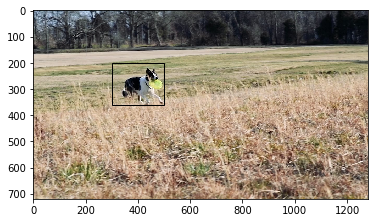

In [12]:
fig, ax = plt.subplots()

x1 = 300
y1 = 200
x2 = 500
y2 = 360

w = x2 - x1
h = y2 - y1

ax.imshow(image_array[0][:,:,::-1])
rectangle = patches.Rectangle((x1, y1),w,h, fill=False)
ax.add_patch(rectangle)

In [13]:
tracker.init(image_array[0], (x1,y1,w,h))

In [14]:
success, xywh = tracker.update(image_array[1])

In [15]:
x = xywh[0]
y = xywh[1]
w = xywh[2]
h = xywh[3]

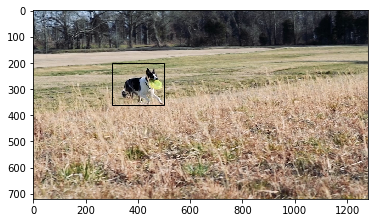

In [16]:
fig, ax = plt.subplots()

ax.imshow(image_array[1][:,:,::-1])
rectangle = patches.Rectangle((x1, y1),w,h, fill=False)
ax.add_patch(rectangle)

### KCF_Tracker 

In [18]:
class KCFTracker:
    def __init__(self):
        self.tracker = cv2.TrackerKCF_create()
        
    def set_bbox(self, image, xyxy_dict=None, polygon_list=None):
        if xyxy_dict is None:
            raise Exception("SiameseMaskTracker set_bbox need xyxy_dict")
        x1 = xyxy_dict["x1"]
        y1 = xyxy_dict["y1"]
        x2 = xyxy_dict["x2"]
        y2 = xyxy_dict["y2"]
        w = x2-x1
        h = y2-y1
        
        self.tracker.init(image, (x1,y1,w,h))
        
    def get_bbox(self, image):
        success, xywh_bbox = self.tracker.update(image)
        
        if success:
            xyxy_dict = {"x1":int(xywh_bbox[0]),
                         "y1":int(xywh_bbox[1]),
                         "x2":int(xywh_bbox[0]+xywh_bbox[2]),
                         "y2":int(xywh_bbox[1]+xywh_bbox[3])
                        }
        else:
            xyxy_dict = None    
        
        out_dict = {"bbox_dict":xyxy_dict, "polygon":None}
        return out_dict

In [19]:
box_tracker = KCFTracker()

In [20]:
x1 = 300
y1 = 200
x2 = 500
y2 = 360
xyxy_dict = {"x1":x1, "y1":y1, "x2":x2, "y2":y2}

In [21]:
box_tracker.set_bbox(image_array[0], xyxy_dict)

In [22]:
out_dict = box_tracker.get_bbox(image_array[1])

In [23]:
out_dict

{'bbox_dict': {'x1': 300, 'y1': 200, 'x2': 500, 'y2': 360}, 'polygon': None}

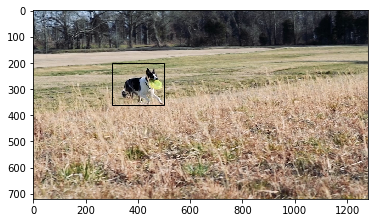

In [24]:
fig, ax = plt.subplots()

pos_dict = out_dict["bbox_dict"]
x1,y1,x2,y2 = pos_dict["x1"], pos_dict["y1"], pos_dict["x2"], pos_dict["y2"]

w = x2 - x1
h = y2 - y1


ax.imshow(image_array[1][:,:,::-1])
rectangle = patches.Rectangle((x1, y1),w,h, fill=False)
ax.add_patch(rectangle)